In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import sklearn

In [5]:
df=pd.read_csv('/content/Telco-Customer-Churn.csv')

In [6]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# EDA

In [10]:
df['TotalCharges'].replace(to_replace=[' ',''],value=np.nan,inplace=True)

In [11]:
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [12]:
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)

In [13]:
df['TotalCharges'].isna().sum()

np.int64(0)

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.drop('customerID',axis=1,inplace=True)

In [16]:
numeric_columns=df.select_dtypes(include=('number')).columns[1:3]
numeric_columns

Index(['tenure', 'MonthlyCharges'], dtype='object')

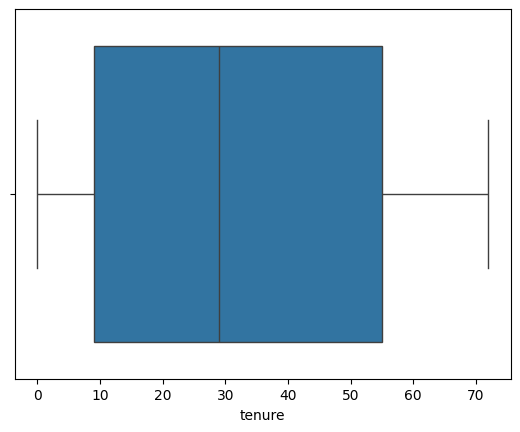

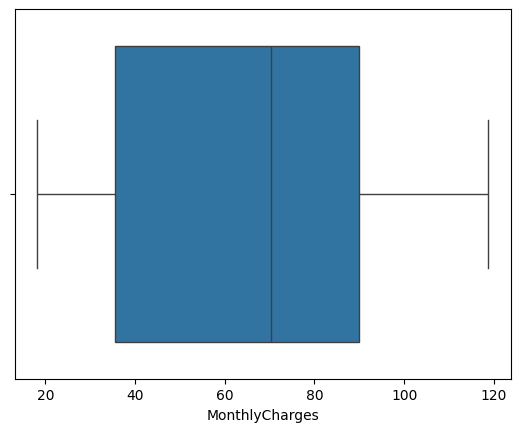

In [17]:
# prompt: check outlier

import matplotlib.pyplot as plt
for i in numeric_columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [18]:
df.shape

(7043, 20)

In [19]:
values_gender=df['gender'].value_counts().values
index_gender=df['gender'].value_counts().index
fig=px.pie(values=values_gender,names=index_gender,template='plotly_dark').update_traces(textinfo='label+percent')
fig.show()

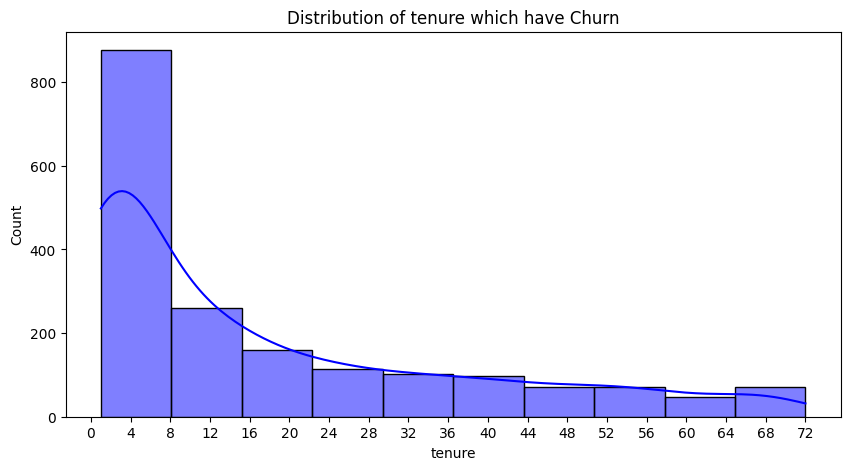

In [20]:
plt.figure(figsize=(10, 5))
sns.histplot(df['tenure'][df['Churn'] == 'Yes'], bins=10, kde=True, color="blue")
plt.title('Distribution of tenure which have Churn')
plt.xticks(range(0,73,4))
plt.show()

In [21]:
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869


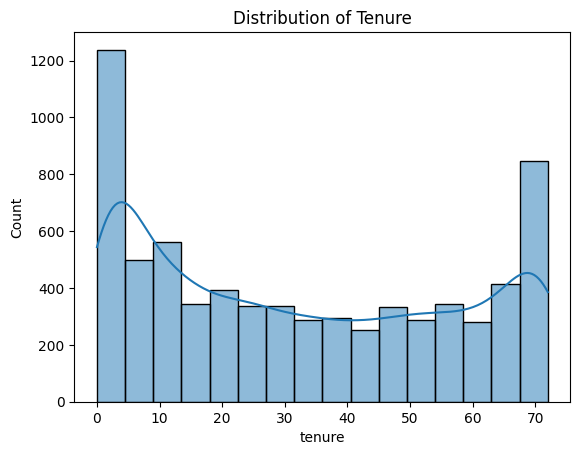

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['tenure'], kde=True)
plt.title("Distribution of Tenure")
plt.show()


In [23]:
pd.crosstab(df['gender'], df['Churn'], normalize='index') * 100


Churn,No,Yes
gender,,
Female,73.079128,26.920872
Male,73.839662,26.160338


In [24]:
pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100




Churn,No,Yes
SeniorCitizen,,
0,76.393832,23.606168
1,58.318739,41.681261


In [25]:
pd.crosstab(df['Partner'], df['Churn'], normalize='index') * 100


Churn,No,Yes
Partner,,
No,67.042021,32.957979
Yes,80.335097,19.664903


#Financial Behavior:

In [26]:
df.groupby('Churn')[['MonthlyCharges', 'TotalCharges']].mean()


,MonthlyCharges,TotalCharges
Churn,,
No,61.265124,2554.765772
Yes,74.441332,1531.796094


In [27]:
pd.crosstab(df['InternetService'], df['Churn'], normalize='index') * 100


Churn,No,Yes
InternetService,,
DSL,81.040892,18.959108
Fiber optic,58.107235,41.892765
No,92.595020,7.404980


In [28]:
pd.crosstab(df['TechSupport'], df['Churn'], normalize='index') * 100


Churn,No,Yes
TechSupport,,
No,58.364526,41.635474
No internet service,92.595020,7.404980
Yes,84.833659,15.166341


In [31]:
pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100


Churn,No,Yes
Contract,,
Month-to-month,57.290323,42.709677
One year,88.730482,11.269518
Two year,97.168142,2.831858


In [32]:
pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


In [33]:
pd.crosstab(df['PaperlessBilling'], df['Churn'], normalize='index') * 100


Churn,No,Yes
PaperlessBilling,,
No,83.669916,16.330084
Yes,66.434908,33.565092


In [35]:
from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'Churn' is the target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing data shape (X_test, y_test):", X_test.shape, y_test.shape)

Training data shape (X_train, y_train): (5634, 19) (5634,)
Testing data shape (X_test, y_test): (1409, 19) (1409,)


In [36]:
# prompt: label encoding data

from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding to the target variable 'Churn'
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print("Encoded Training labels:", y_train_encoded[:5])
print("Encoded Testing labels:", y_test_encoded[:5])

# Apply Label Encoding to binary categorical features in the feature set
binary_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for col in binary_cols:
    if col in X_train.columns:
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])

print("\nAfter Label Encoding binary columns:")
print(X_train[binary_cols].head())
print(X_test[binary_cols].head())

Encoded Training labels: [0 0 1 1 0]
Encoded Testing labels: [1 0 0 1 0]

After Label Encoding binary columns:
      gender  SeniorCitizen  Partner  Dependents  PhoneService  \
2142       0              0        0           1             1   
1623       0              0        0           0             1   
6074       1              0        1           0             0   
1362       1              0        0           0             1   
6754       1              0        0           1             1   

      PaperlessBilling  
2142                 0  
1623                 1  
6074                 1  
1362                 1  
6754                 1  
      gender  SeniorCitizen  Partner  Dependents  PhoneService  \
185        0              0        1           0             0   
2715       1              0        0           0             1   
3825       0              0        1           1             1   
1807       0              0        0           0             1   
132        1

In [38]:
# prompt: logistic regression model

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Separate features and target
# X = df.drop('Churn', axis=1)
# y = df['Churn']

# Preprocessing (One-Hot Encoding for remaining categorical features)
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Align columns after one-hot encoding - this is crucial!
train_cols = X_train_encoded.columns
test_cols = X_test_encoded.columns

missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test_encoded[c] = 0

missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train_encoded[c] = 0

# Ensure the order of columns is the same
X_test_encoded = X_test_encoded[train_cols]


# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear') # Using liblinear solver suitable for small datasets and binary classification

# Train the model
model.fit(X_train_encoded, y_train_encoded)

# Make predictions on the test set
y_pred = model.predict(X_test_encoded)

# Evaluate the model
accuracy = accuracy_score(y_test_encoded, y_pred)
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
class_report = classification_report(y_test_encoded, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# You can optionally visualize the confusion matrix


Accuracy: 0.8176

Confusion Matrix:
[[932 104]
 [153 220]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.76      1409
weighted avg       0.81      0.82      0.81      1409



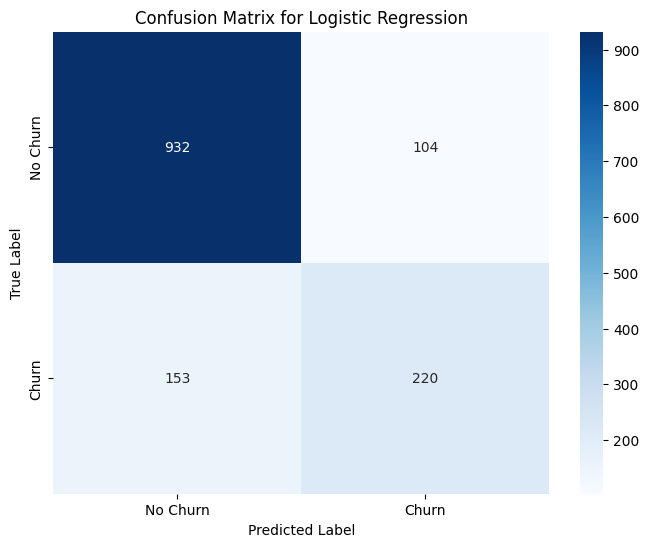

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


Payment and Billing:

In [42]:

df.head().T

,0,1,2,3,4
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No
OnlineBackup,Yes,No,Yes,No,No


In [43]:
pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100


Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),83.290155,16.709845
Credit card (automatic),84.756899,15.243101
Electronic check,54.714588,45.285412
Mailed check,80.893300,19.106700


In [44]:
pd.crosstab(df['PaperlessBilling'], df['Churn'], normalize='index') * 100


Churn,No,Yes
PaperlessBilling,,
No,83.669916,16.330084
Yes,66.434908,33.565092


In [48]:
# prompt: model knn

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Initialize the K-Nearest Neighbors model
# You can experiment with different values of n_neighbors
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn_model.fit(X_train_encoded, y_train_encoded)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test_encoded)

# Evaluate the model
accuracy_knn = accuracy_score(y_test_encoded, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test_encoded, y_pred_knn)
class_report_knn = classification_report(y_test_encoded, y_pred_knn)

print("--- K-Nearest Neighbors Model ---")
print(f"Accuracy: {accuracy_knn:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_knn)
print("\nClassification Report:")
print(class_report_knn)



--- K-Nearest Neighbors Model ---
Accuracy: 0.7771

Confusion Matrix:
[[914 122]
 [192 181]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1036
           1       0.60      0.49      0.54       373

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409



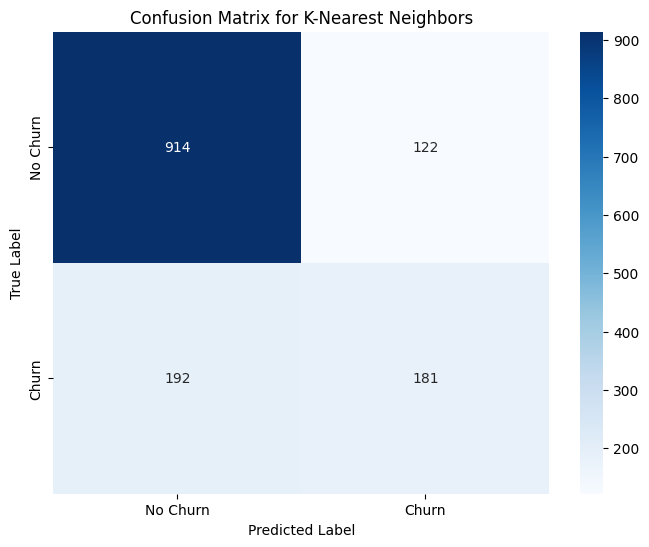

In [47]:
# Visualize the confusion matrix for KNN
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.show()


--- Decision Tree Model ---
Accuracy: 0.7111

Confusion Matrix:
[[829 207]
 [200 173]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1036
           1       0.46      0.46      0.46       373

    accuracy                           0.71      1409
   macro avg       0.63      0.63      0.63      1409
weighted avg       0.71      0.71      0.71      1409



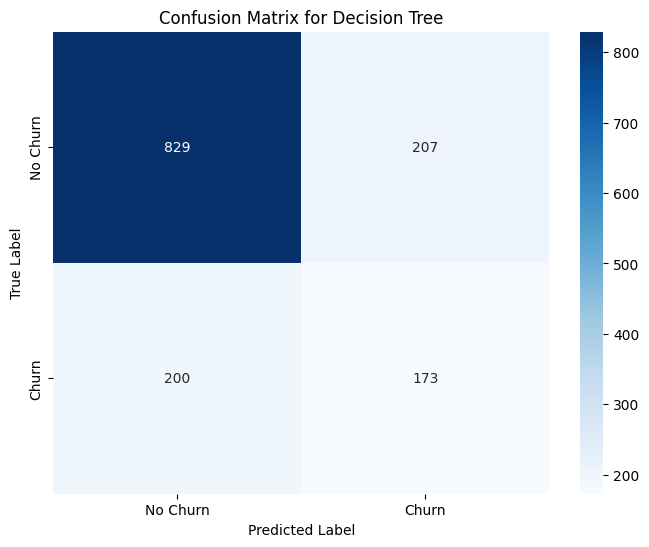

In [49]:
# prompt: decision tree

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Initialize the Decision Tree model
# You can experiment with parameters like criterion ('gini' or 'entropy'), max_depth, min_samples_split, etc.
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train_encoded, y_train_encoded)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test_encoded)

# Evaluate the model
accuracy_dt = accuracy_score(y_test_encoded, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test_encoded, y_pred_dt)
class_report_dt = classification_report(y_test_encoded, y_pred_dt)

print("--- Decision Tree Model ---")
print(f"Accuracy: {accuracy_dt:.4f}")
print("\nConfusion Matrix:")
print(conf_matrix_dt)
print("\nClassification Report:")
print(class_report_dt)


# Visualize the confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

# Optional: Visualize the Decision Tree (requires graphviz)
# !pip install graphviz
# import graphviz
# dot_data = tree.export_graphviz(dt_model, out_file=None,
#                                 feature_names=X_train_encoded.columns,
#                                 class_names=['No Churn', 'Churn'],
#                                 filled=True, rounded=True,
#                                 special_characters=True)
# graph = graphviz.Source(dot_data)
# graph.render("telco_churn_decision_tree", view=True) # Saves to a file and opens it

